In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
C = 1000.
margin = 0.1
data = pd.read_csv(f'experiments/M_{margin}_data.csv')
data = data[(data['C'] == C)]
#data = data[(data['R'] < 400000)]

(0.0, 1.0)

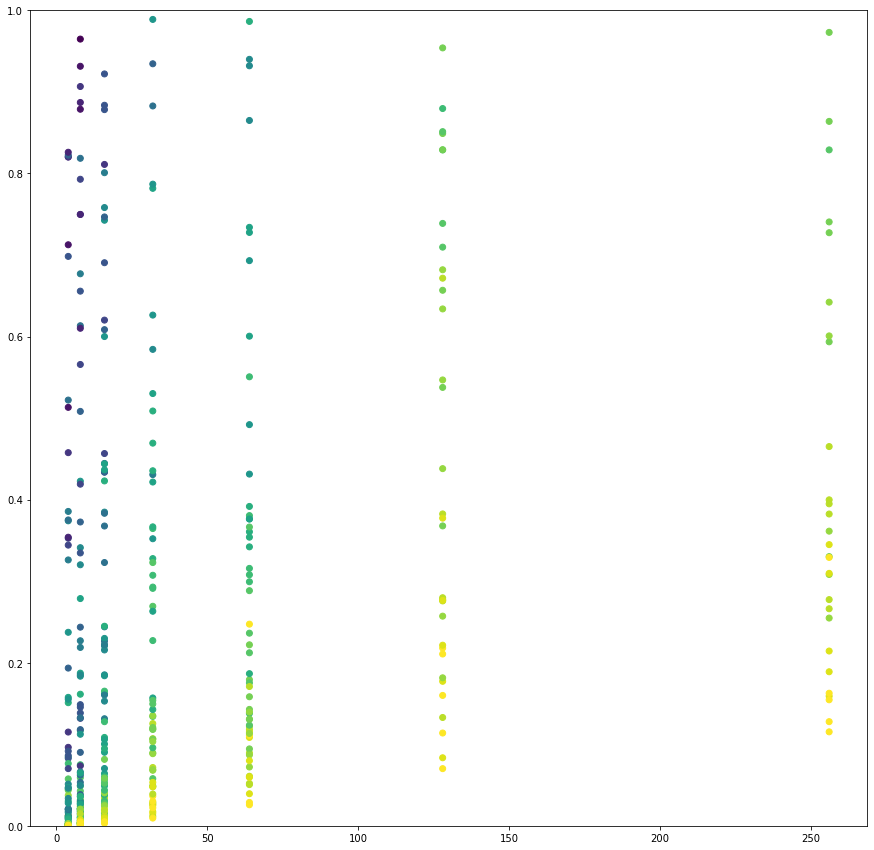

In [15]:
Ms = list(set(data['M']))
Ms.sort()
Ms = np.array(Ms)
shots = list(set(data['R']))
compressed_data = pd.DataFrame(columns=['M','R','mean','std','max','min','n'])
for M in Ms:
    for R in shots:
        mean = np.mean(data[(data['M'] == M) & (data['R'] == R)]['epsilon'])
        std = np.std(data[(data['M'] == M) & (data['R'] == R)]['epsilon'])
        max = np.max(data[(data['M'] == M) & (data['R'] == R)]['epsilon'])
        min = np.min(data[(data['M'] == M) & (data['R'] == R)]['epsilon'])
        n = len(data[(data['M'] == M) & (data['R'] == R)]['epsilon'])
        compressed_data.loc[compressed_data.shape[0]] = [M,R,mean,std,max,min,n]
plt.figure(figsize=(15,15))
colors = np.log(data['R'])
plt.scatter(data['M'],data['epsilon'],c=colors,cmap='viridis')
plt.ylim(0,1)

In [16]:
epsilons, h = np.linspace(0,0.4,100,retstep=True)
R_needed = np.zeros((len(epsilons),len(Ms)))
for j, e in enumerate(epsilons):
    for i, M in enumerate(Ms):
        data_M = compressed_data[compressed_data['M'] ==  M]
        filter = np.abs(np.array(data_M['mean'])) < e
        R_needed[j,i] = np.min(data_M['R'][filter])

In [17]:
R_needed

array([[         nan,          nan,          nan,          nan,
                 nan,          nan,          nan],
       [5.242880e+05, 1.048576e+06,          nan,          nan,
                 nan,          nan,          nan],
       [5.242880e+05, 1.048576e+06,          nan,          nan,
                 nan,          nan,          nan],
       [1.310720e+05, 5.242880e+05, 2.097152e+06,          nan,
                 nan,          nan,          nan],
       [1.310720e+05, 1.310720e+05, 1.048576e+06,          nan,
                 nan,          nan,          nan],
       [6.553600e+04, 1.310720e+05, 5.242880e+05,          nan,
                 nan,          nan,          nan],
       [6.553600e+04, 6.553600e+04, 2.621440e+05, 2.097152e+06,
                 nan,          nan,          nan],
       [3.276800e+04, 3.276800e+04, 2.621440e+05, 2.097152e+06,
                 nan,          nan,          nan],
       [3.276800e+04, 3.276800e+04, 2.621440e+05, 2.097152e+06,
                

** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number  6 had an illegal value
** On entry to DGELSD, parameter number 

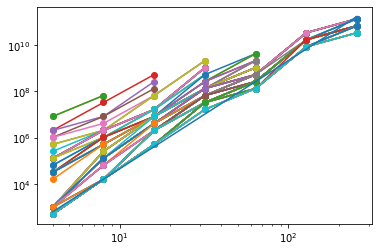

In [18]:
exponents = []
new_eps = []
for j, e in enumerate(epsilons):
    try:
        plt.plot(Ms,Ms**2*R_needed[j,:],'-o',label=e)
        plt.xscale('log')
        plt.yscale('log')
        p = np.polyfit(np.log(Ms),np.log(Ms**2*R_needed[j,:]),1)
        print(np.exp(p[1]))
        exponents.append(p[0])
        new_eps.append(e)
    except:
        continue
plt.plot(Ms,Ms**(14/3))

Text(0, 0.5, 'Exponent')

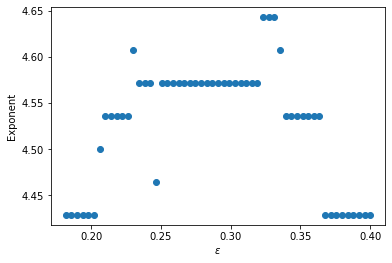

In [19]:
plt.scatter(new_eps,exponents)
plt.xlabel(r'$\varepsilon$')
plt.ylabel('Exponent')


In [20]:
np.mean(exponents)

4.526623376623374

In [21]:
def get_R(a,b,c,d,eps,M):
    return c*(M**a/eps**b) + d

fun = lambda x: get_R(x[0],x[1],x[2],x[3],data['epsilon'],data['M']) - data['R']

In [22]:
x0 = [4,2,1,0]
np.linalg.norm(fun(x0))

1463058857895.997

In [23]:
from scipy.optimize import leastsq
x = leastsq(fun,x0)[0]
print(x)
print(np.linalg.norm(fun(x)))

[ 8.49278587e-01  4.51423335e-01  5.77271828e+03 -5.41270395e+04]
10396169.948942116
